<a href="https://colab.research.google.com/github/Amruthamsh/SJF_python/blob/main/OS_group_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Non Preemptive - SJF**

Enter number of process: 10
Enter Burst Time:
P1: 6
P2: 12
P3: 4
P4: 8
P5: 10
P6: 4
P7: 17
P8: 16
P9: 13
P10: 9

Process ID	Burst Time	Waiting Time	Turnaround Time
P3		4		0		4
P6		4		4		8
P1		6		8		14
P4		8		14		22
P10		9		22		31
P5		10		31		41
P2		12		41		53
P9		13		53		66
P8		16		66		82
P7		17		82		99

Average Waiting Time= 32.1
Average Turnaround Time= 42.0


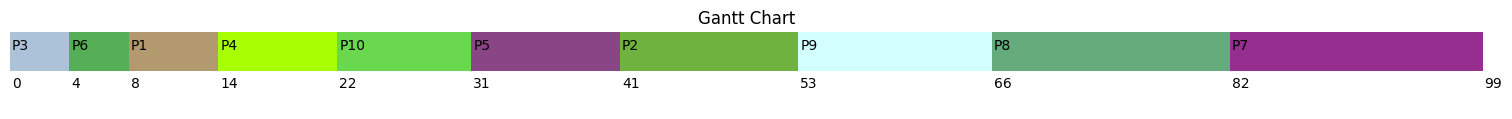

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def main():
  # Taking the number of processes
  n = int(input("Enter number of process: "))
  # Matrix for storing Process Id, Burst Time, Waiting Time, Turn Around Time.
  A = [[0 for j in range(4)] for i in range(100)]
  gantt_pos = [[0 for j in range(2)] for i in range(n)]
  total, avg_wt, avg_tat = 0, 0, 0

  print("Enter Burst Time:")
  for i in range(n): # User Input Burst Time and alloting Process Id.
    A[i][1] = int(input(f"P{i+1}: "))
    A[i][0] = i + 1

  # Sorting process according to their Burst Time - selection sort
  for i in range(n):
    index = i
    for j in range(i + 1, n):
      if A[j][1] < A[index][1]:
        index = j
    # Swap burst time
    temp = A[i][1]
    A[i][1] = A[index][1]
    A[index][1] = temp
    # Swap alloted id
    temp = A[i][0]
    A[i][0] = A[index][0]
    A[index][0] = temp

  # Calculation of Waiting Times (after having sorted the array by the burst times)
  A[0][2] = 0
  for i in range(1, n):
    A[i][2] = 0
    for j in range(i):
      A[i][2] += A[j][1]
    total += A[i][2]
  avg_wt = total / n
  total = 0

  # Calculation of Turn Around Time and Waiting Time before printing the data.
  print("\nProcess ID\tBurst Time\tWaiting Time\tTurnaround Time")
  for i in range(n):
    A[i][3] = A[i][1] + A[i][2]
    total += A[i][3]
    print(f"P{A[i][0]}\t\t{A[i][1]}\t\t{A[i][2]}\t\t{A[i][3]}")
    gantt_pos[i][0] = A[i][2]
    gantt_pos[i][1] = A[i][3]
  avg_tat = total / n
  print(f"\nAverage Waiting Time= {avg_wt}")
  print(f"Average Turnaround Time= {avg_tat}")

  # Gantt chart

  end_pos = gantt_pos[n-1][1]
  # Horizontal bar plot
  fig, ax = plt.subplots()
  fig.set_figheight(1)
  fig.set_figwidth(min(end_pos//5, 20))

  ax.broken_barh(gantt_pos, (0,1), facecolors=(mcolors.XKCD_COLORS))
  ax.set_ylim(-1,1)
  ax.set_xlim(0, end_pos)

  plt.axis('off')
  for i in range(n):
    ax.annotate(f"P{A[i][0]}",
                xy=(gantt_pos[i][0] , .5), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')
    ax.annotate(gantt_pos[i][0],
                xy=(gantt_pos[i][0], -.5), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')

  ax.annotate(end_pos,
                xy=(end_pos, -.5), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')
  plt.title("Gantt Chart")
  plt.show()

if __name__ == "__main__":
  main()

**Preemptive - SJF**

Enter number of processes: 7

P1
Enter Arrival Time: 2
Enter Burst Time: 4

P2
Enter Arrival Time: 4
Enter Burst Time: 6

P3
Enter Arrival Time: 0
Enter Burst Time: 10

P4
Enter Arrival Time: 7
Enter Burst Time: 15

P5
Enter Arrival Time: 8
Enter Burst Time: 2

P6
Enter Arrival Time: 10
Enter Burst Time: 4

P7
Enter Arrival Time: 12
Enter Burst Time: 5

Process ID	Arrival Time	Burst Time	Completion Time	Turnaround Time	Waiting Time
3		0		10		31		31		21		
1		2		4		6		4		0		
2		4		6		14		10		4		
4		7		15		46		39		24		
5		8		2		10		2		0		
6		10		4		18		8		4		
7		12		5		23		11		6		
Average Turnaround Time: 15.0
Average Waiting Time: 8.428571428571429
Sequence of Process: [3, 3, 1, 1, 1, 1, 2, 2, 5, 5, 2, 2, 2, 2, 6, 6, 6, 6, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


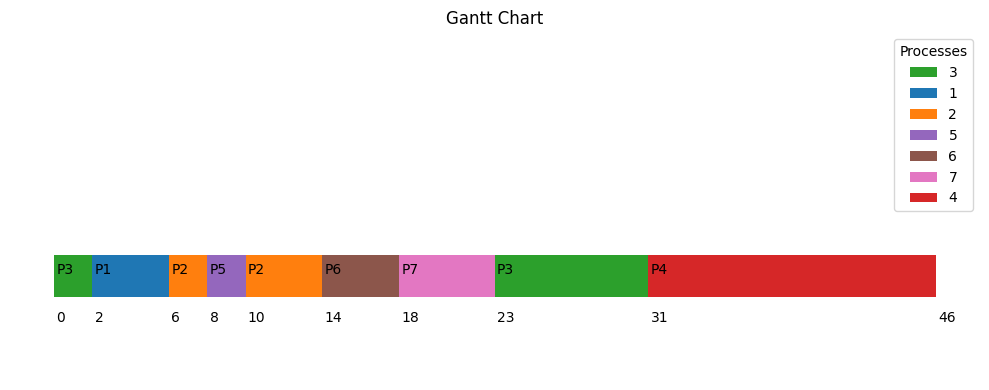

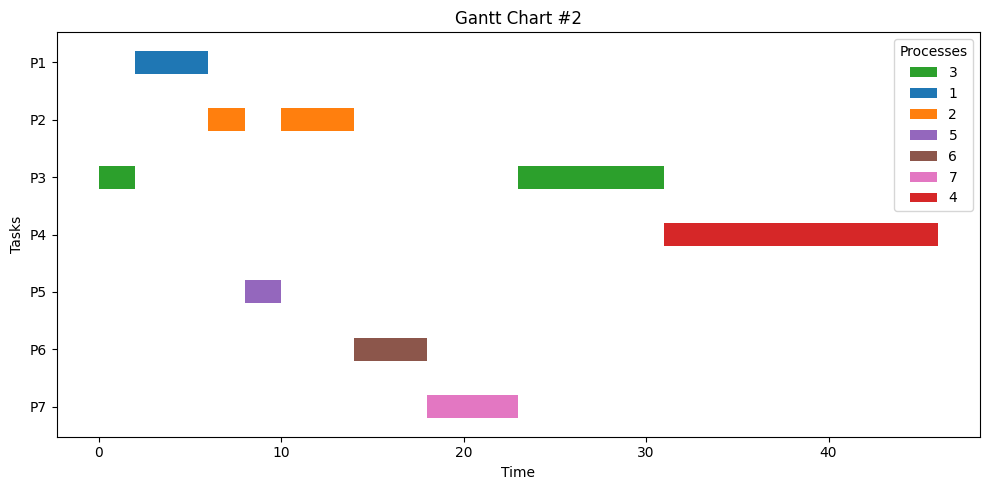

In [ ]:
import matplotlib.pyplot as plt

class SJF:
  def processData(self, no_of_processes):
      process_data = []
      for i in range(no_of_processes):
          temporary = []
          process_id = i+1
          print(f"\nP{process_id}")
          arrival_time = int(input(f"Enter Arrival Time: "))
          burst_time = int(input(f"Enter Burst Time: "))
          #'0' is the state of the process. 0 is not executed and 1 means execution complete
          temporary.extend([process_id, arrival_time, burst_time, 0, burst_time])
          process_data.append(temporary)
      SJF.schedulingProcess(self, process_data)

  def schedulingProcess(self, process_data):
    s_time = 0 # start/current time
    sequence_of_process = [] #to store the sequence in which the processes are scheduled.
    process_data.sort(key=lambda x: x[1]) #Sort processes according to the Arrival Time

    while 1: #runs at every single unit time
      ready_queue = [] # processes that are ready to execute
      normal_queue = [] # processes that are not ready yet (due to their arrival time).
      temp = []

      for i in range(len(process_data)):
        ''' making sure what is being added to ready_queue has arrival time less than s_time,
        and process_data[i][3] == '0' means not executed '''
        if process_data[i][1] <= s_time and process_data[i][3] == 0:
          temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][4]])
          ready_queue.append(temp)
          temp = []
        # if arrival time is more than s_time but the process has not completed execution
        elif process_data[i][3] == 0:
          temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][4]])
          normal_queue.append(temp)
          temp = []

      if len(ready_queue) == 0 and len(normal_queue) == 0: # all processes have completed execution
        break

      if len(ready_queue) != 0:
        ready_queue.sort(key=lambda x: x[2]) #Sort processes according to Burst Time
        s_time = s_time + 1
        e_time = s_time
        sequence_of_process.append(ready_queue[0][0])
        for k in range(len(process_data)): #len(process_data) returns the number of ALL processes
          #To find the correct process_id index in the OG process_data to deduct burst time
          if process_data[k][0] == ready_queue[0][0]:
            break
        process_data[k][2] = process_data[k][2] - 1
        if process_data[k][2] == 0: # if burst time is 0, it means the process is completed
          process_data[k][3] = 1 # setting process [k] as completed
          process_data[k].append(e_time) # this is where completion time is added to the processes

      if len(ready_queue) == 0: #this is true when we have entered no processes with arrival time 0.
        if s_time < normal_queue[0][1]:
          s_time = normal_queue[0][1]
        s_time = s_time + 1
        e_time = s_time
        sequence_of_process.append(normal_queue[0][0])
        for k in range(len(process_data)):
          if process_data[k][0] == normal_queue[0][0]:
              break
        process_data[k][2] = process_data[k][2] - 1
        if process_data[k][2] == 0:  # if burst time is 0, it means the process is completed
          process_data[k][3] = 1
          process_data[k].append(e_time)

    t_time = SJF.calculateTurnaroundTime(self, process_data)
    w_time = SJF.calculateWaitingTime(self, process_data)
    SJF.printData(self, process_data, t_time, w_time, sequence_of_process)
    SJF.gantt_chart(self,sequence_of_process)
    SJF.gantt_chart2(self,sequence_of_process)

  def calculateTurnaroundTime(self, process_data):
    total_turnaround_time = 0
    for i in range(len(process_data)):
      #turnaround_time = completion_time - arrival_time
      turnaround_time = process_data[i][5] - process_data[i][1]
      total_turnaround_time = total_turnaround_time + turnaround_time
      process_data[i].append(turnaround_time)
    #average_turnaround_time = total_turnaround_time / no_of_processes
    average_turnaround_time = total_turnaround_time / len(process_data)
    return average_turnaround_time

  def calculateWaitingTime(self, process_data):
    total_waiting_time = 0
    for i in range(len(process_data)):
      #waiting_time = turnaround_time - burst_time
      waiting_time = process_data[i][6] - process_data[i][4]
      total_waiting_time = total_waiting_time + waiting_time
      process_data[i].append(waiting_time)
    #average_waiting_time = total_waiting_time / no_of_processes
    average_waiting_time = total_waiting_time / len(process_data)

    return average_waiting_time

  def printData(self, process_data, average_turnaround_time, average_waiting_time, sequence_of_process):
    process_data.sort(key=lambda x: x[1]) #Sort processes according to Arrival Time
    print("\nProcess ID\tArrival Time\tBurst Time\tCompletion Time\tTurnaround Time\tWaiting Time")
    for i in range(len(process_data)):
      for j in range(len(process_data[i])):
        if(j != 2 and j !=3):
          print(process_data[i][j], end="\t\t")
      print()
    print(f'Average Turnaround Time: {average_turnaround_time}')
    print(f'Average Waiting Time: {average_waiting_time}')
    print(f'Sequence of Process: {sequence_of_process}')

  def gantt_chart2(self, sequence):
    tasks = []
    start_time = 0
    for i in range(1, len(sequence)):
      if sequence[i] != sequence[i - 1]:
        tasks.append((start_time, i - 1, sequence[i - 1]))
        start_time = i
    tasks.append((start_time, len(sequence) - 1, sequence[-1]))

    fig, ax = plt.subplots(figsize=(10, 5))
    for i, task in enumerate(tasks):
      start, end, label = task
      duration = end - start + 1
      ax.broken_barh([(start, duration)], (label - 1.2, 0.4),
                     facecolors=f'C{label-1}', label=str(label))

    ax.set_xlabel('Time')
    ax.set_ylabel('Tasks')
    ax.set_title('Gantt Chart #2')
    ax.invert_yaxis()
    handles, labels = plt.gca().get_legend_handles_labels()
    #using dictionary to avoid duplicate processes in the legend
    by_label = dict(zip(labels, handles))
    ax.set_yticks(range(len(by_label.values())))
    ax.set_yticklabels([f'P{i+1}' for i in range(len(by_label.values()))])
    ax.legend(by_label.values(), by_label.keys(), title='Processes')
    ax.grid(False)

    plt.tight_layout()
    plt.show()

  def gantt_chart(self, sequence):
    tasks = []
    start_time = 0
    for i in range(1, len(sequence)):
      if sequence[i] != sequence[i - 1]:
        tasks.append((start_time, i - 1, sequence[i - 1]))
        start_time = i
    tasks.append((start_time, len(sequence) - 1, sequence[-1]))

    fig, ax = plt.subplots(figsize=(10, 4))
    for i, task in enumerate(tasks):
      start, end, label = task
      duration = end - start + 1
      ax.broken_barh([(start, duration)], (1.2, 0.6),
                     facecolors=f'C{label-1}', label=str(label))
      ax.annotate(f"P{label}", xy=(start , 1.5), xycoords='data',
                  xytext=(1.5, 1.5), textcoords='offset points')
      ax.annotate(start, xy=(start, .8), xycoords='data', xytext=(1.5, 1.5), textcoords='offset points')

    ax.annotate(end+1, xy=(end+1, .8), xycoords='data',
                xytext=(1.5, 1.5), textcoords='offset points')

    ax.set_title('Gantt Chart')
    plt.ylim((0,5))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    handles, labels = plt.gca().get_legend_handles_labels()
    #using dictionary to avoid duplicate processes in the legend
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title='Processes')
    ax.grid(False)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
  no_of_processes = int(input("Enter number of processes: "))
  sjf = SJF()
  sjf.processData(no_of_processes)

In [ ]:
!jupyter nbconvert --to html /content/OS_group_activity.ipynb

[NbConvertApp] Converting notebook /content/OS_group_activity.ipynb to html
[NbConvertApp] Writing 689272 bytes to /content/OS_group_activity.html
